# <ins> Project 1: </ins> 
### Using regression tools to analyze COVID 19 data at the County level for multiple States in the US

***
### Academic honesty statement

**SANTIAGO ORTIZ LAVERDE**

- I state that I worked alone on this assignment. Therefore, I take full responsibility for the academic integrity of the work presented below.
***

### File name *(0) preliminary_data_analysis.ipynb*
- A preliminary data analysis is performed to select the US States of interest on which the study will be conducted.

In [1]:
import pandas as pd
import seaborn as sns; sns.set(style="darkgrid")
import numpy as np
import matplotlib.pyplot as plt

#### 1. Import and convert .cvs files (raw data) files to pandas dataframes.

In [2]:
# Education estimates from 2019 at the county level throughout the United States.
raw_edu = pd.read_csv('data/Education/education_data_2019.csv')
# Income (total household) estimates from 2019 at the county level throughout the United States.
raw_inco = pd.read_csv('data/Income/income_data_2019.csv')
# Total population census from 2020 at the county level throughout the United States.
raw_popul_20 = pd.read_csv('data/Population/population_2020.csv', encoding='iso-8859-1')
# COVID-19 data from 2020 and 2021 at the county level.
raw_covid_20 = pd.read_csv('data/COVID-19/US_COVID-19_2020.csv', encoding='iso-8859-1')
raw_covid_21 = pd.read_csv('data/COVID-19/US_COVID-19_2021.csv', encoding='iso-8859-1')

#### 2. Filter, group and merge data from Pandas DataFrames.

In [3]:
# Create empty dataframes
merged_df = pd.DataFrame()
popul = pd.DataFrame()
ratio = pd.DataFrame()
household = pd.DataFrame()
covid19_20 = pd.DataFrame()
covid19_21 = pd.DataFrame()
# Filter and group data from Population column in Education DataFrame. 
popul['State'] = raw_edu['State']
popul['Population'] = raw_edu['Population_total']
popul = popul.groupby(['State']).sum()
popul = popul.reset_index()
# Filter and group data from Education DataFrame.
ratio['State'] = raw_edu['State']
ratio['Ratio'] = raw_edu['Ratio']
ratio = ratio.groupby(['State']).mean()
ratio = ratio.reset_index()
# Filter and group data from Income DataFrame.
household['State'] = raw_inco['State']
household['Household'] = raw_inco['Households_total']
household = household.groupby(['State']).mean()
household = household.reset_index()
# Filter and group data from Population (2020) DataFrame.
popul_20 = raw_popul_20.groupby(['State']).sum()
popul_20 = popul_20.reset_index()
states_ls = popul['State'].tolist()
# Filter and group data from COVID-19 (2020) DataFrame.
filt20 = raw_covid_20[raw_covid_20['date'] == '12/31/2020']
covid19_20['State'] = filt20['State']
covid19_20['deaths'] = filt20['deaths']
covid19_20 = covid19_20.groupby(['State']).sum()
covid19_20 = covid19_20.reset_index()
covid19_20 = covid19_20[covid19_20['State'].isin(states_ls)]
covid19_20 = covid19_20.reset_index(drop=True)
# Filter and group data from COVID-19 (2021) DataFrame.
filt21 = raw_covid_21[raw_covid_21['date'] == '2021-12-31']
covid19_21['State'] = filt21['State']
covid19_21['deaths'] = filt21['deaths']
covid19_21 = covid19_21.groupby(['State']).sum()
covid19_21 = covid19_21.reset_index()
covid19_21 = covid19_21[covid19_21['State'].isin(states_ls)]
covid19_21 = covid19_21.reset_index(drop=True)
# Consolidate data from all filtered and grouped DataFrame.
merged_df['State'] = popul['State']
merged_df['Population'] = popul['Population']
ratio = ratio['Ratio']
household = household['Household']
merged_df['Ratio'] = ratio
merged_df['Household'] = household
#merged_df['Interaction'] = (ratio/ratio.max())*(household/household.max())
merged_df['Deaths_rate_2020'] = 1E5*covid19_20['deaths']/popul_20['Estimate']
merged_df['Deaths_rate_2021'] = 1E5*covid19_21['deaths']/popul_20['Estimate']
# Sort merged DataFrame by values in Population column (descending order). 
merged_df = merged_df.sort_values(by=['Population'], ascending=False)
merged_df = merged_df.reset_index(drop=True)

#### 3. Display top 5 most populated states in the U.S.

In [4]:
merged_df.iloc[0:5, :]

,State,Population,Ratio,Household,Deaths_rate_2020,Deaths_rate_2021
0,California,39512223,0.188448,316777.243902,65.991422,194.959984
1,Texas,28995881,0.125906,162044.203704,98.322212,265.621882
2,Florida,21477737,0.158358,187187.463415,102.144873,294.595013
3,New York,19453561,0.198710,180662.076923,192.453449,302.298009
4,Pennsylvania,12801989,0.166866,118209.300000,125.206284,286.872449


#### 4. Visualize consolidated DataFrame

<IPython.core.display.Javascript object>


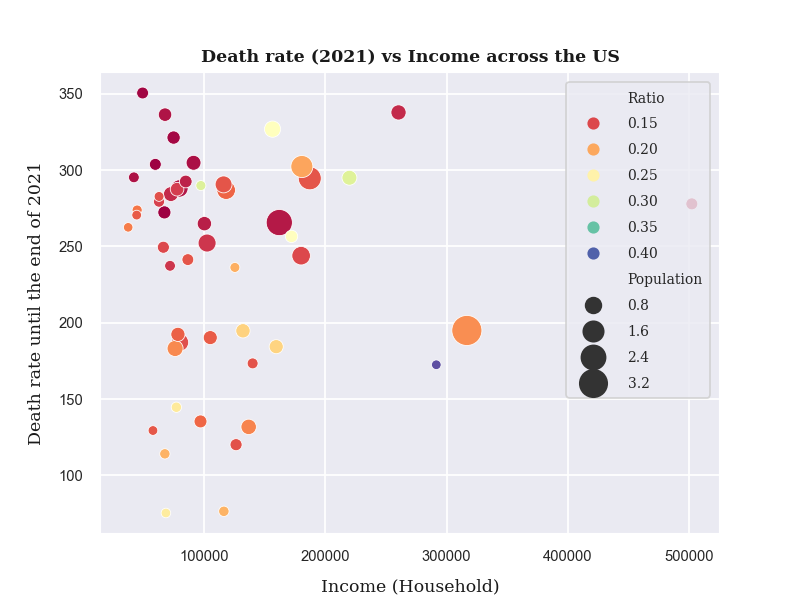

In [8]:
%matplotlib notebook
font = {'family':'serif', 'color':'k', 'weight':'normal', 'size':10, 'style':'normal'}
font_title = {'family':'serif', 'color':'k', 'weight':'bold', 'size':10, 'style':'normal'}
sc1 = sns.scatterplot(merged_df, x="Household", y="Deaths_rate_2021", palette="Spectral",
                      hue="Ratio", size="Population", sizes=(30, 300), legend='brief')
plt.title("Death rate (2021) vs Income across the US", fontdict=font_title)
plt.xlabel("Income (Household)", fontdict=font, labelpad=8)
plt.ylabel("Death rate until the end of 2021", fontdict=font, labelpad=8)
plt.xticks(fontsize=8.5)
plt.yticks(fontsize=8.5)
plt.legend(loc='upper right');
plt.setp(sc1.get_legend().get_texts(), fontsize='8', fontfamily='serif');

<IPython.core.display.Javascript object>


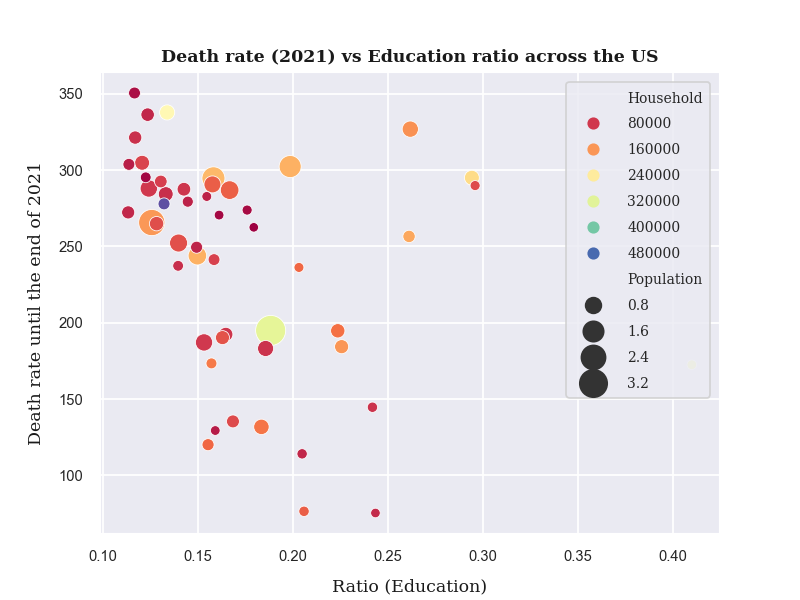

In [9]:
%matplotlib notebook
sc2 = sns.scatterplot(merged_df, x="Ratio", y="Deaths_rate_2021", palette="Spectral",
                      hue="Household", size="Population", sizes=(30, 300), legend='brief')
plt.title("Death rate (2021) vs Education ratio across the US", fontdict=font_title)
plt.xlabel("Ratio (Education)", fontdict=font, labelpad=8)
plt.ylabel("Death rate until the end of 2021", fontdict=font, labelpad=8)
plt.xticks(fontsize=8.5)
plt.yticks(fontsize=8.5)
plt.legend(loc='upper right')
plt.setp(sc2.get_legend().get_texts(), fontsize='8', fontfamily='serif');

<IPython.core.display.Javascript object>


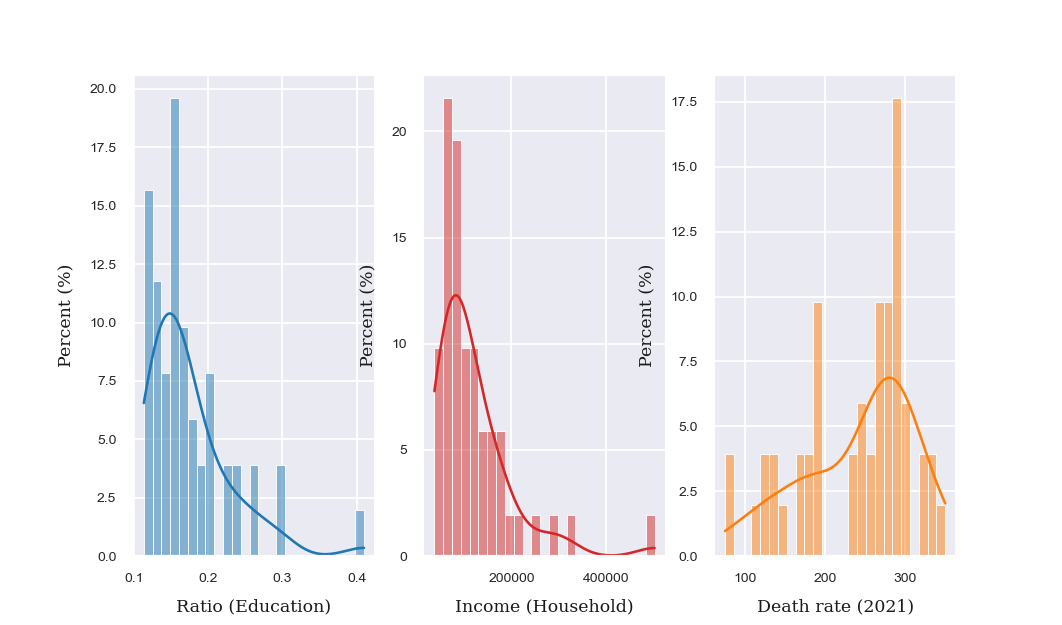

In [7]:
#create boxplot in each subplot
%matplotlib notebook
fig, axes = plt.subplots(1, 3, figsize=(8.5, 5))
h1 = sns.histplot(merged_df, x='Ratio', bins=25, ax=axes[0], kde=True, color='tab:blue', stat="percent")
h1.set_xlabel("Ratio (Education)", fontdict=font, labelpad=8)
h1.set_ylabel("Percent (%)", fontdict=font, labelpad=8)
h1.yaxis.set_tick_params(labelsize=8)
h1.xaxis.set_tick_params(labelsize=8)
h2 = sns.histplot(merged_df, x='Household', bins=25, ax=axes[1], kde=True, color='tab:red', stat="percent")
h2.set_xlabel("Income (Household)", fontdict=font, labelpad=8)
h2.set_ylabel("Percent (%)", fontdict=font, labelpad=8)
h2.yaxis.set_tick_params(labelsize=8)
h2.xaxis.set_tick_params(labelsize=8)
h3 = sns.histplot(merged_df, x='Deaths_rate_2021', bins=25, ax=axes[2], kde=True, color='tab:orange', stat="percent")
h3.set_xlabel("Death rate (2021)", fontdict=font, labelpad=8)
h3.set_ylabel("Percent (%)", fontdict=font, labelpad=8)
h3.yaxis.set_tick_params(labelsize=8)
h3.xaxis.set_tick_params(labelsize=8);

***